In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydub import AudioSegment
from pydub.playback import play
import random
from scipy.io.wavfile import write

In [10]:
# Define HMM Parameters
initial_probabilities = {
    '/s/': 1.0,
    '/p/': 0.0,
    '/ie:/': 0.0,
    '/tS/': 0.0
}

transition_probabilities = {
    '/s/': {'/s/': 0.1, '/p/': 0.8, '/ie:/': 0.1, '/tS/': 0.0},
    '/p/': {'/s/': 0.0, '/p/': 0.1, '/ie:/': 0.8, '/tS/': 0.1},
    '/ie:/': {'/s/': 0.0, '/p/': 0.0, '/ie:/': 0.2, '/tS/': 0.8},
    '/tS/': {'/s/': 0.2, '/p/': 0.0, '/ie:/': 0.0, '/tS/': 0.8}
}

emission_probabilities = {
    '/s/': {'Energy': 0.7, 'Pitch': 0.2, 'Duration': 0.1},
    '/p/': {'Energy': 0.5, 'Pitch': 0.3, 'Duration': 0.2},
    '/ie:/': {'Energy': 0.3, 'Pitch': 0.5, 'Duration': 0.2},
    '/tS/': {'Energy': 0.4, 'Pitch': 0.4, 'Duration': 0.2}
}

In [11]:
# Function to display matrices
def display_hmm_matrices(initial_probs, trans_probs, emiss_probs):
    print("Initial Probabilities:")
    for state, prob in initial_probs.items():
        print(f"{state}: {prob:.2f}")
    
    print("\nTransition Probabilities:")
    header = "From \\ To"
    print(f"{header:<10}", end="")
    for to_state in trans_probs:
        print(f"{to_state:<8}", end="")
    print()
    for from_state, transitions in trans_probs.items():
        print(f"{from_state:<10}", end="")
        for to_state in transitions:
            print(f"{transitions[to_state]:<8.2f}", end="")
        print()
    
    print("\nEmission Probabilities:")
    for state, emissions in emiss_probs.items():
        print(f"{state}: {emissions}")

In [12]:
# Function to visualize transition probabilities as heatmap
def plot_transition_matrix(trans_probs):
    states = list(trans_probs.keys())
    matrix = np.array([[trans_probs[from_state][to_state] for to_state in states] for from_state in states])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=states, yticklabels=states)
    plt.title("Transition Probability Matrix")
    plt.xlabel("To State")
    plt.ylabel("From State")
    plt.show()

In [13]:
# Function to visualize emission probabilities as bar charts
def plot_emission_probabilities(emiss_probs):
    observations = list(next(iter(emiss_probs.values())).keys())
    states = list(emiss_probs.keys())
    
    plt.figure(figsize=(10, 6))
    for state in states:
        probs = [emiss_probs[state][obs] for obs in observations]
        plt.bar([f"{state}-{obs}" for obs in observations], probs, label=state)
    
    plt.title("Emission Probabilities for Each Phoneme")
    plt.xlabel("Phoneme-Observation Pair")
    plt.ylabel("Probability")
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

In [14]:
# Function to generate a phoneme sequence
def generate_sequence(initial_probs, trans_probs, emiss_probs, sequence_length=5):
    states = list(initial_probs.keys())
    current_state = random.choices(states, weights=list(initial_probs.values()))[0]
    phoneme_sequence = [current_state]
    observation_sequence = []

    for _ in range(sequence_length - 1):
        next_state = random.choices(states, weights=[trans_probs[current_state][s] for s in states])[0]
        phoneme_sequence.append(next_state)
        current_state = next_state

    for state in phoneme_sequence:
        observations = list(emiss_probs[state].keys())
        observation = random.choices(observations, weights=[emiss_probs[state][obs] for obs in observations])[0]
        observation_sequence.append(observation)

    return phoneme_sequence, observation_sequence

In [15]:
# Function to synthesize audio from phoneme sequence
def synthesize_audio(phoneme_sequence, phoneme_map):
    combined_audio = AudioSegment.empty()
    for phoneme in phoneme_sequence:
        audio_file = phoneme_map.get(phoneme)
        if audio_file:
            phoneme_audio = AudioSegment.from_file(audio_file)
            combined_audio += phoneme_audio
        else:
            print(f"Warning: No audio file found for phoneme {phoneme}")
    return combined_audio

Initial Probabilities:
/s/: 1.00
/p/: 0.00
/ie:/: 0.00
/tS/: 0.00

Transition Probabilities:
From \ To /s/     /p/     /ie:/   /tS/    
/s/       0.10    0.80    0.10    0.00    
/p/       0.00    0.10    0.80    0.10    
/ie:/     0.00    0.00    0.20    0.80    
/tS/      0.20    0.00    0.00    0.80    

Emission Probabilities:
/s/: {'Energy': 0.7, 'Pitch': 0.2, 'Duration': 0.1}
/p/: {'Energy': 0.5, 'Pitch': 0.3, 'Duration': 0.2}
/ie:/: {'Energy': 0.3, 'Pitch': 0.5, 'Duration': 0.2}
/tS/: {'Energy': 0.4, 'Pitch': 0.4, 'Duration': 0.2}


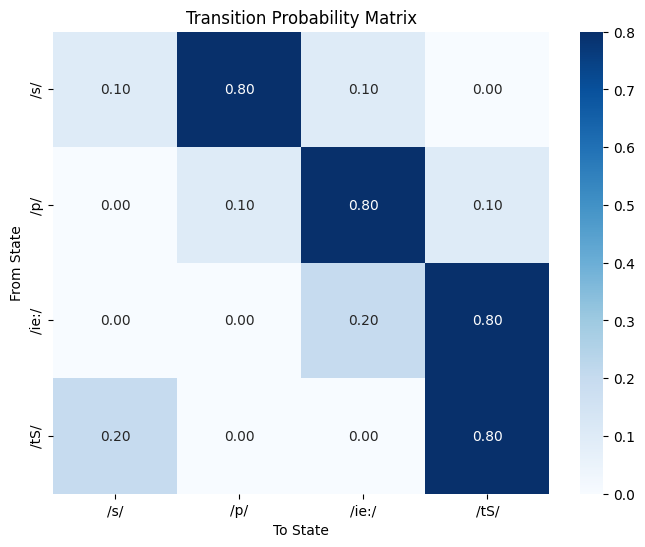

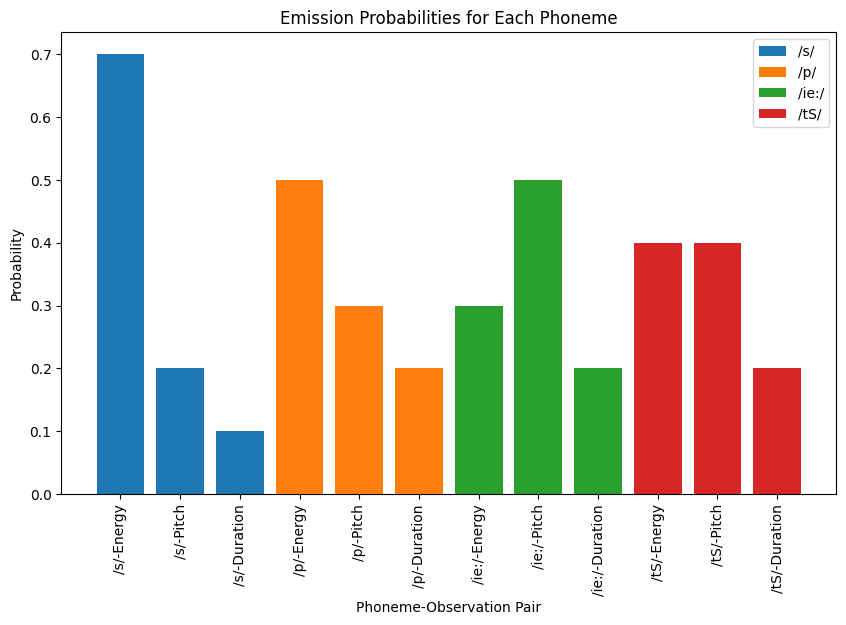


Generated Phoneme Sequence: ['/s/', '/s/', '/p/', '/ie:/', '/tS/']
Generated Observation Sequence: ['Pitch', 'Duration', 'Energy', 'Energy', 'Duration']


In [16]:
# Main Execution
if __name__ == "__main__":
    # Display HMM matrices
    display_hmm_matrices(initial_probabilities, transition_probabilities, emission_probabilities)

    # Visualize probabilities
    plot_transition_matrix(transition_probabilities)
    plot_emission_probabilities(emission_probabilities)

    # Generate and print sequences
    phoneme_seq, observation_seq = generate_sequence(initial_probabilities, transition_probabilities, emission_probabilities)
    print("\nGenerated Phoneme Sequence:", phoneme_seq)
    print("Generated Observation Sequence:", observation_seq)

    #Synthesize and play audio
    #audio = synthesize_audio(phoneme_seq, phoneme_audio_map)
    #play(audio)